In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('churn.csv')
data.drop('RowNumber', axis=1, inplace=True)
data.drop('CustomerId', axis=1, inplace=True)
data.drop('Surname', axis=1, inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


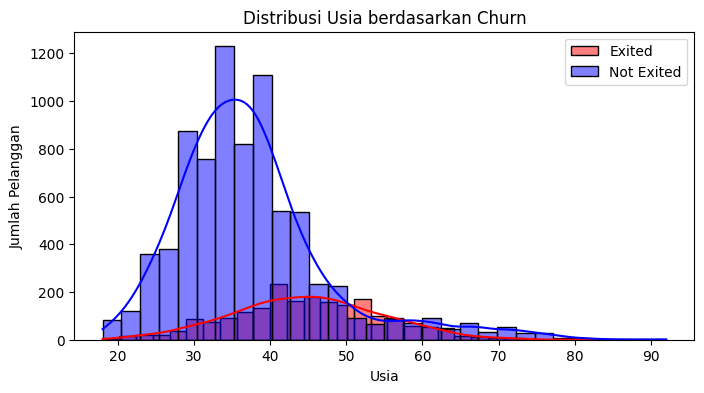

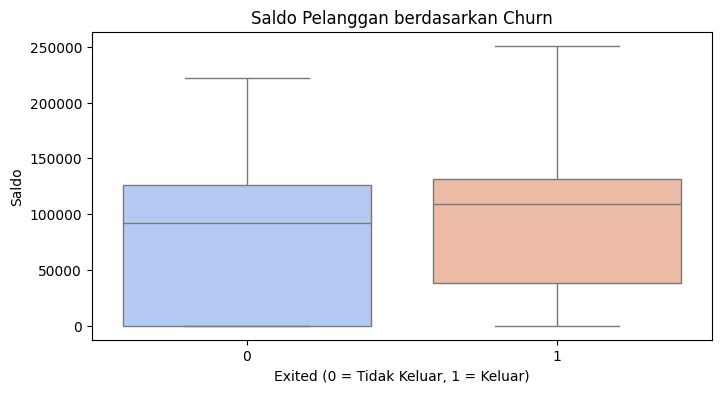

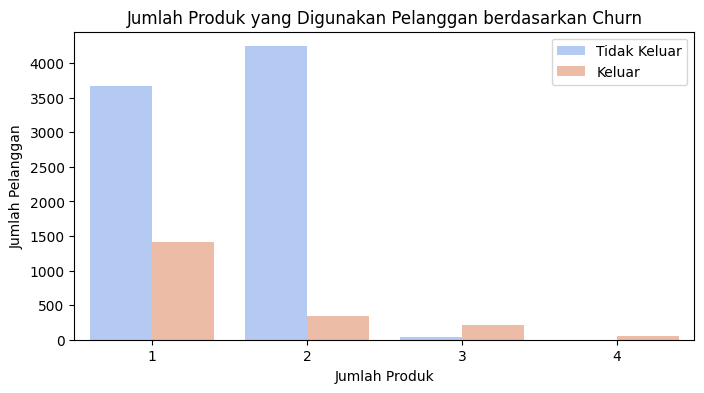

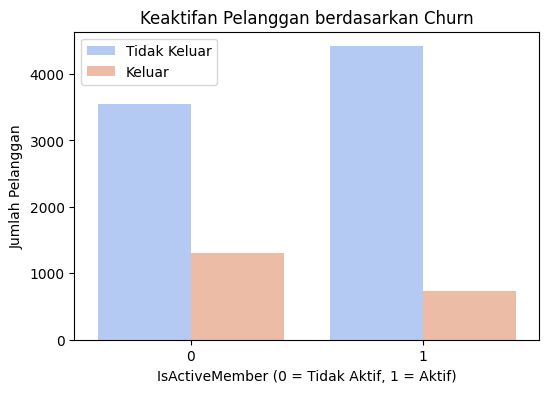

In [26]:
# Analisis hubungan fitur dengan churn boxplotnya dari column di data(Balance dan CreditScore)

# Distribusi usia berdasarkan churn
plt.figure(figsize=(8, 4))
sns.histplot(data[data["Exited"] == 1]["Age"], bins=30, color="red", label="Exited", kde=True)
sns.histplot(data[data["Exited"] == 0]["Age"], bins=30, color="blue", label="Not Exited", kde=True)
plt.legend()
plt.title("Distribusi Usia berdasarkan Churn")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()

# Boxplot saldo berdasarkan churn
plt.figure(figsize=(8, 4))
sns.boxplot(x="Exited", y="Balance", data=data, palette="coolwarm")
plt.title("Saldo Pelanggan berdasarkan Churn")
plt.xlabel("Exited (0 = Tidak Keluar, 1 = Keluar)")
plt.ylabel("Saldo")
plt.show()

# Distribusi jumlah produk berdasarkan churn
plt.figure(figsize=(8, 4))
sns.countplot(x="NumOfProducts", hue="Exited", data=data, palette="coolwarm")
plt.title("Jumlah Produk yang Digunakan Pelanggan berdasarkan Churn")
plt.xlabel("Jumlah Produk")
plt.ylabel("Jumlah Pelanggan")
plt.legend(["Tidak Keluar", "Keluar"])
plt.show()

# Status keaktifan pelanggan berdasarkan churn
plt.figure(figsize=(6, 4))
sns.countplot(x="IsActiveMember", hue="Exited", data=data, palette="coolwarm")
plt.title("Keaktifan Pelanggan berdasarkan Churn")
plt.xlabel("IsActiveMember (0 = Tidak Aktif, 1 = Aktif)")
plt.ylabel("Jumlah Pelanggan")
plt.legend(["Tidak Keluar", "Keluar"])
plt.show()


In [27]:
df_model = data

# Encoding variabel kategori
df_model = pd.get_dummies(df_model, columns=["Geography", "Gender"], drop_first=True)

df_model

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True



Logistic Regression Model:
  Accuracy: 77.20%
  F1 Score: 0.51
  ROC-AUC Score: 0.78
  Best Threshold: 0.42
  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1593
           1       0.45      0.59      0.51       407

    accuracy                           0.77      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000


Decision Tree Model:
  Accuracy: 83.80%
  F1 Score: 0.59
  ROC-AUC Score: 0.84
  Best Threshold: 0.48
  Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1593
           1       0.61      0.58      0.59       407

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000


Random Forest Model:
  Accuracy: 83.70%
  F1 Score: 0.63
  ROC-AUC Score: 0.86
  

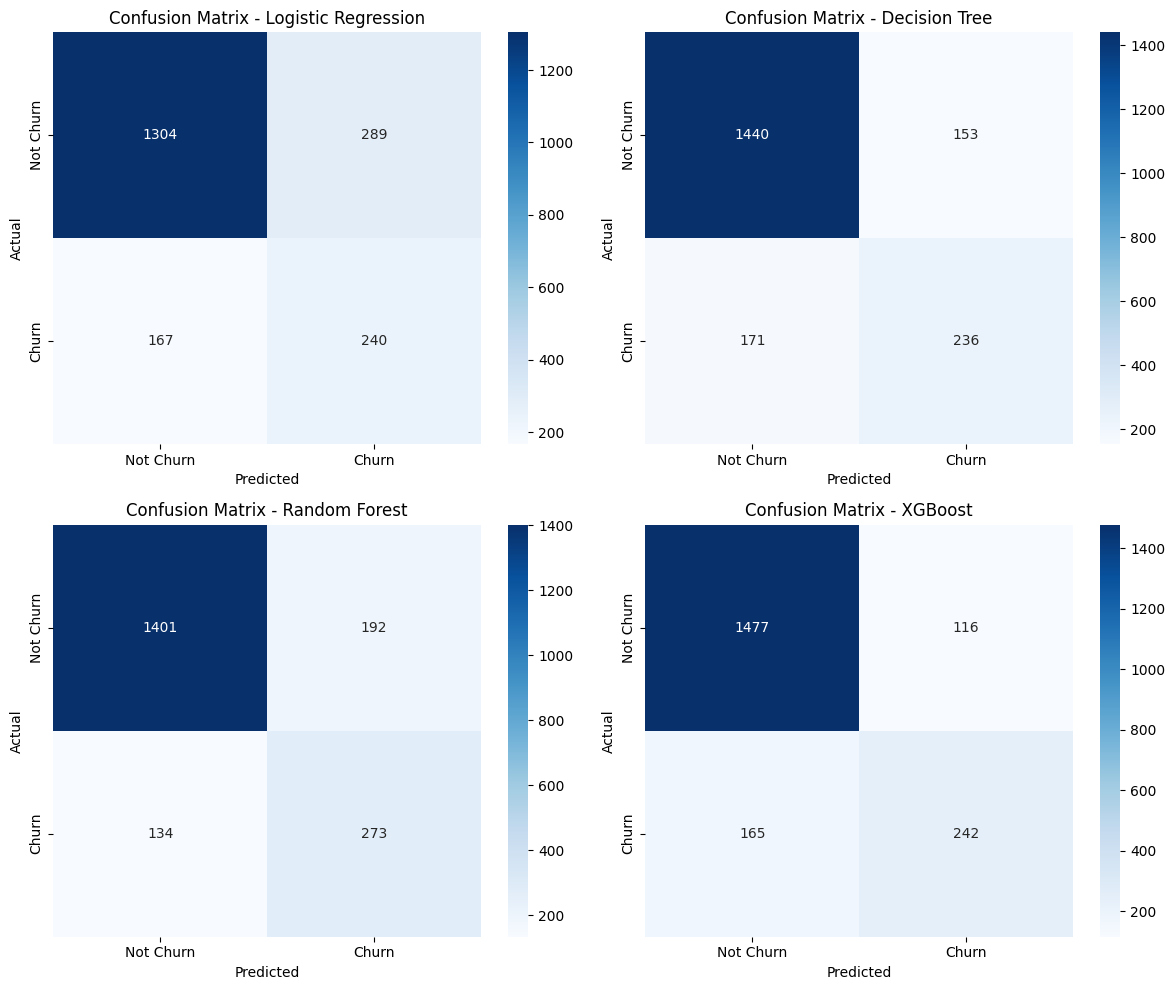

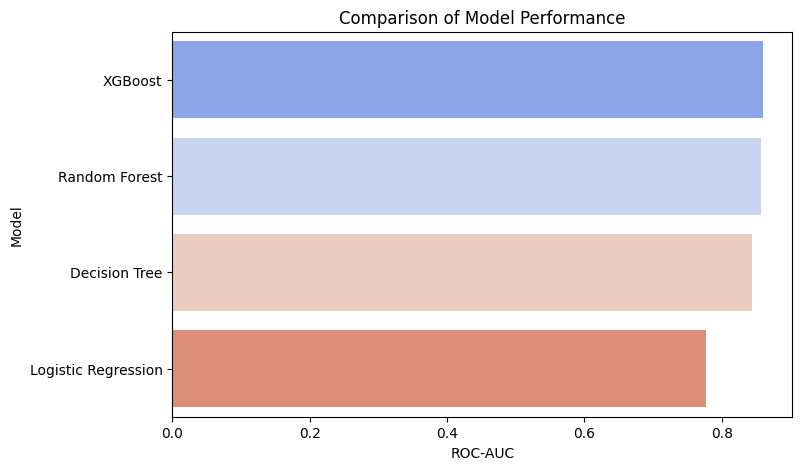

In [28]:
# Pisahkan fitur dan target
X = df_model.drop(columns=["Exited"])
y = df_model["Exited"]

# Split data untuk validasi akhir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi hanya untuk Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Fold Cross Validation (K=10)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Fungsi untuk menemukan threshold terbaik
def find_best_threshold(model, X_test, y_test):
    probs = model.predict_proba(X_test)[:, 1]
    best_threshold, best_f1 = 0.5, 0
    thresholds = np.arange(0.1, 0.9, 0.01)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_test, preds)
        if f1 > best_f1:
            best_f1, best_threshold = f1, t
    return best_threshold

# ========================
# 1. Logistic Regression
# ========================
lr = LogisticRegression(solver='liblinear', class_weight={0:1, 1:2})
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_
best_threshold_lr = find_best_threshold(best_lr, X_test_scaled, y_test)

# ========================
# 2. Decision Tree
# ========================
dt = DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:2})
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
best_threshold_dt = find_best_threshold(best_dt, X_test, y_test)

# ========================
# 3. Random Forest
# ========================
rf = RandomForestClassifier(random_state=42, class_weight={0:1, 1:2})
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
best_threshold_rf = find_best_threshold(best_rf, X_test, y_test)

# ========================
# 4. XGBoost
# ========================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=2)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
best_threshold_xgb = find_best_threshold(best_xgb, X_test, y_test)

# ========================
# Evaluasi Model dan Confusion Matrix
# ========================
models = {
    "Logistic Regression": (best_lr, X_test_scaled, best_threshold_lr),
    "Decision Tree": (best_dt, X_test, best_threshold_dt),
    "Random Forest": (best_rf, X_test, best_threshold_rf),
    "XGBoost": (best_xgb, X_test, best_threshold_xgb),
}

results = []
plt.figure(figsize=(12, 10))

for i, (name, (model, X_data, threshold)) in enumerate(models.items()):
    probs = model.predict_proba(X_data)[:, 1]
    y_pred = (probs >= threshold).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probs)
    
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC-AUC": roc_auc, "Best Threshold": threshold})
    
    print(f"\n{name} Model:")
    print(f"  Accuracy: {acc:.2%}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  ROC-AUC Score: {roc_auc:.2f}")
    print(f"  Best Threshold: {threshold:.2f}")
    print("  Classification Report:\n", classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i+1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

# ========================
# Perbandingan Model
# ========================
df_results = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x="ROC-AUC", y="Model", data=df_results, palette="coolwarm")
plt.title("Comparison of Model Performance")
plt.show()